In [1]:
import torch

/home/zheyu/Anaconda/envs/robosaga/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
n_samples = 10000
buffer_watcher = torch.zeros(n_samples)
global_indices = torch.arange(n_samples)
data = torch.randn(n_samples, 10)

batch_size = 100
update_percent = 0.1

n_epochs = 11
for _ in range(n_epochs):
    global_ids = torch.randperm(n_samples)
    for i in range(0, n_samples, batch_size):
        current_global_ids = global_ids[i:i+batch_size]
        batch_indices = torch.arange(0, batch_size) 
        update_freq = buffer_watcher[current_global_ids]
        sorted_update_freq, sorted_indices = torch.sort(update_freq)
        batch_indices = batch_indices[sorted_indices]
        current_global_ids = current_global_ids[sorted_indices]
        n_update_samples = int(batch_size * update_percent)
        buffer_watcher[current_global_ids[:n_update_samples]] += 1
    updated_sample_count = torch.sum(buffer_watcher > 0)
    print(f"Buffer watcher: {updated_sample_count/n_samples} samples seen")

Buffer watcher: 0.10000000149011612 samples seen
Buffer watcher: 0.20000000298023224 samples seen
Buffer watcher: 0.30000001192092896 samples seen
Buffer watcher: 0.4000000059604645 samples seen
Buffer watcher: 0.5 samples seen
Buffer watcher: 0.6000000238418579 samples seen
Buffer watcher: 0.699999988079071 samples seen
Buffer watcher: 0.800000011920929 samples seen
Buffer watcher: 0.8999999761581421 samples seen
Buffer watcher: 0.9879000186920166 samples seen
Buffer watcher: 1.0 samples seen


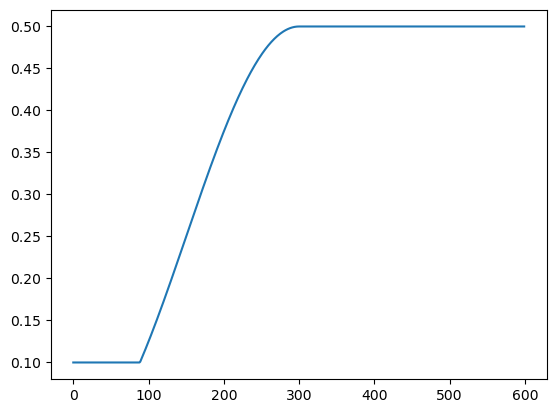

In [3]:
import numpy as np
from math import cos, pi
import matplotlib.pyplot as plt

aug_ratio = 0.5
saturation_epoch = 300
epoch_idx = np.arange(0, 600)  
update_ratio = 0.1

lambda_ = 0.5 * (1 - np.cos(epoch_idx * pi / saturation_epoch))
lambda_[epoch_idx > saturation_epoch] = 1
aug_ratio = aug_ratio * lambda_
aug_ratio[aug_ratio < update_ratio] = update_ratio

plt.plot(epoch_idx, aug_ratio)

In [4]:
import os
from PIL import Image

def crop_and_save_as_png(image_path):
    img = Image.open(image_path)
    is_jpg = image_path.endswith('.jpg')    
    width, height = img.size
    # if width != height or is_jpg:
    min_dim = min(width, height)
    left = (width - min_dim)/2
    top = (height - min_dim)/2
    right = (width + min_dim)/2
    bottom = (height + min_dim)/2
    img = img.crop((left, top, right, bottom))
    img = img.resize((800, 800))
    image_path_new = os.path.splitext(image_path)[0] + '.png'
    img.save(image_path_new, 'PNG')
    # save n randomly cropped and rotated images
    for i in range(1, 4):
        img = img.rotate(90 * i)
        img.save(os.path.splitext(image_path)[0] + f'_{i}.png', 'PNG')
    
    
    if is_jpg:
        os.remove(image_path)

directory = '/home/zheyu/RoboSaGA/robosuite/robosuite/models/assets/textures/evaluation_textures/floor'
for filename in os.listdir(directory):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        crop_and_save_as_png(os.path.join(directory, filename))
        
        

KeyboardInterrupt: 

In [ ]:
import torch 
import hydra
from diffusion_policy.workspace.base_workspace import BaseWorkspace
from diffusion_policy.policy.base_image_policy import BaseImagePolicy
import dill

import zarr
import numpy


/home/zheyu/Anaconda/envs/robosaga/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
data_path = 'data/green_pnp.zarr'
store = zarr.DirectoryStore(data_path)
src_root = zarr.group(store=store, overwrite=False)
#
data = src_root['data']
meta = src_root['meta']

print(meta.tree())

meta
 └── episode_ends (160,) int64


In [ ]:
img = "/home/zheyu/RoboSaGA/experiments/robosaga/lift_image/bc_rnn/saga/20240531091404/saliency/epoch_162/batch_15_saliency.jpg"


# the image contains multiple images with black borders, extract each image
import cv2
import numpy as np

# Load the image
image_path = "/home/zheyu/RoboSaGA/experiments/robosaga/lift_image/bc_rnn/saga/20240531091404/saliency/epoch_162/batch_15_saliency.jpg"
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to separate the black borders
_, threshold = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Find contours of the black borders
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract each image
extracted_images = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    extracted_image = image[y:y+h, x:x+w]
    extracted_images.append(extracted_image)

# Display the extracted images
for i, extracted_image in enumerate(extracted_images):
    cv2.imshow(f"Extracted Image {i+1}", extracted_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Load the image
image_path = "/home/zheyu/RoboSaGA/experiments/robosaga/lift_image/bc_rnn/saga/20240531091404/saliency/epoch_162/batch_15_saliency.jpg"
image = cv2.imread(image_path)

if image is None:
    print("Failed to load image")
else:
    print("Image loaded successfully")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to separate the black borders
_, threshold = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

# Find contours of the black borders
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if not contours:
    print("No contours found")
else:
    print(f"Found {len(contours)} contours")

# Extract each image
extracted_images = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    extracted_image = image[y:y+h, x:x+w]
    extracted_images.append(extracted_image)

if not extracted_images:
    print("No images extracted")
else:
    print(f"Extracted {len(extracted_images)} images")

# Display the extracted images
for i, extracted_image in enumerate(extracted_images):
    cv2.imshow(f"Extracted Image {i+1}", extracted_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
bc_no_aug = [0.1, 0.15, 0.18, 0.11]
bc_overlay = [0.77, 0.61, 0.35, 0.13]
bc_soda = [0.88, 0.57, 0.24, 0.12]
bc_saga = [0.92, 0.75, 0.48, 0.12]

rnn_no_aug = [0.05, 0.16, 0.17, 0.12]
rnn_overlay = [0.94, 0.58, 0.49, 0.25]
rnn_soda = [0.79, 0.59, 0.3, 0.22]
rnn_saga = [0.96, 0.6, 0.59, 0.33]

diff_no_aug = [0.7, 0.45, 0.25, 0.22]
diff_overlay = [0.99, 0.73, 0.74, 0.51]
diff_soda = [0.99, 0.68, 0.72, 0.47]
diff_saga = [0.97, 0.86, 0.83, 0.57] 

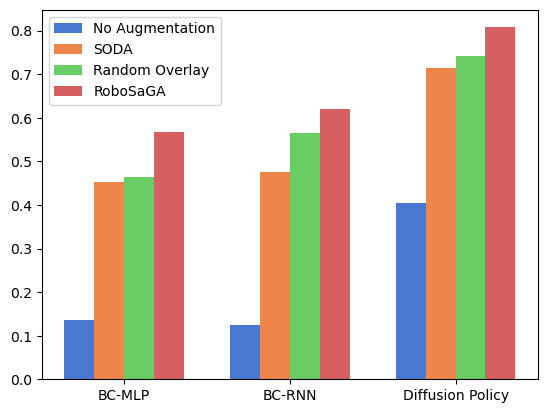

In [27]:
bc_no_aug = np.mean(np.array(bc_no_aug))
bc_overlay = np.mean(np.array(bc_overlay))
bc_soda = np.mean(np.array(bc_soda))
bc_saga = np.mean(np.array(bc_saga))

rnn_no_aug = np.mean(np.array(rnn_no_aug))
rnn_overlay = np.mean(np.array(rnn_overlay))
rnn_soda = np.mean(np.array(rnn_soda))
rnn_saga = np.mean(np.array(rnn_saga))

diff_no_aug = np.mean(np.array(diff_no_aug))
diff_overlay = np.mean(np.array(diff_overlay))
diff_soda = np.mean(np.array(diff_soda))
diff_saga = np.mean(np.array(diff_saga))

bc = [bc_no_aug, bc_soda, bc_overlay, bc_saga]

rnn = [rnn_no_aug, rnn_soda, rnn_overlay, rnn_saga]

diff = [diff_no_aug,diff_soda,  diff_overlay,  diff_saga]


no_aug = [bc_no_aug, rnn_no_aug, diff_no_aug]
soda = [bc_soda, rnn_soda, diff_soda]
overlay = [bc_overlay, rnn_overlay, diff_overlay]
saga = [bc_saga, rnn_saga, diff_saga]



import matplotlib.pyplot as plt
import numpy as np

# Set the bar width
barWidth = 0.18


r1 = np.arange(len(no_aug))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, no_aug, color='#4878D0', width=barWidth, label='No Augmentation')
plt.bar(r2, soda, color='#EE854A', width=barWidth, label='SODA')
plt.bar(r3, overlay, color='#6ACC64', width=barWidth, label='Random Overlay')
plt.bar(r4, saga, color='#D65F5F', width=barWidth, label='RoboSaGA')

plt.xticks([r + barWidth*1.5 for r in range(len(no_aug))], ['BC-MLP', 'BC-RNN', 'Diffusion Policy'])
plt.legend()
plt.show()


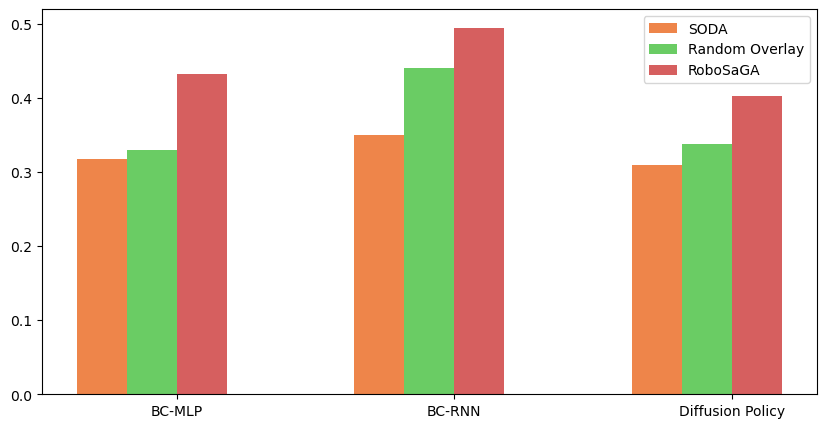

In [30]:
soda_diff = np.array(soda) - np.array(no_aug)
overlay_diff = np.array(overlay) - np.array(no_aug)
saga_diff = np.array(saga) - np.array(no_aug)


barWidth = 0.18
plt.figure(figsize=(10, 5))

r1 = np.arange(len(soda_diff))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, soda_diff, color='#EE854A', width=barWidth, label='SODA')
plt.bar(r2, overlay_diff, color='#6ACC64', width=barWidth, label='Random Overlay')
plt.bar(r3, saga_diff, color='#D65F5F', width=barWidth, label='RoboSaGA')

plt.xticks([r + barWidth*1.5 for r in range(len(soda_diff))], ['BC-MLP', 'BC-RNN', 'Diffusion Policy'])

plt.legend()
plt.show()

